In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import axes3d  
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from EDA_helper import *

In [2]:
df = pd.read_excel("../datasets/msft_test.xlsx", engine='openpyxl')

df1 = pd.read_csv("../datasets/constituents_csv.csv")
sp_energ = df1[df1["Sector"] == "Energy"]
ratings = pd.read_excel("../datasets/100_ratings_06-17.xlsx")
figs = pd.read_excel("../datasets/fin_figs_1.xlsx")

c:\users\rodri\appdata\local\programs\python\python37\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
len(ratings['Company Name'].unique())

86

In [3]:
a = list(sp_energ["Symbol"])
b = ["RDS.A", "PTR", "TOT", "SNP", "BP", "ENB", "PBR", "CEO", "EQNR", "EPD", "TRP", "COP","E", "KMI",'PSX', 
 'EOG', 'SLB', 'WMB', 'MPC', 'CNQ', 'EC', 'MPLX', 'SU', 'VLO', 'BKR', 'CQP', 'PXD', 'ET', 'OKE', 'HES', 
 'LNG', 'HAL', 'PBA', 'IMO', 'OXY', 'CXO', 'MMP', 'TS', 'COG', 'PAA', 'PSXP', 'FANG', 'CLR', 'CVE', 
 'WES', 'TRGP', 'HESM', 'PE', 'DVN', 'SSL', 'SHI', 'NOV','TPL','EQT','MRO','PDS','APA','VVV','UGP',
 'NFG','CZZ','SHLX','HFC','CCJ','YPF','WPX','FTI','DCP','XEC','AM','ETRN','OVV','REGI','ENBL','SUN','CNX',
 'CHX', 'TCP','SWN','HP','RRC',
     
    'WHD','INT','EURN','PDCE','ENLC','PAGP','BSM','CVI','MUR','MGY','HEP',
     'NS','DKL','FRO','CRC', 'WHD',  'CZZ',  'TCP',  'SWN',  'INT',  'CLNE',  'RRC',  'CRC',  'MUR',  'ENLC', 
    'CVI',  'MTDR', 'PAGP',  'AR', 'RIG',  'NS',  'DKL',  'CLB',  'EURN',  'BSM', 
    'HEP',  'DEN',  'CPG',  'AROC', 'DK',  'LBRT',  'CEQP',  'RTLR',  'USAC',  'BPMP',  'GLNG', 'FRO', 
     'DRQ',  'BROG', 'PTEN',  'KOS',  'NBLX',  'TGP', 'CRK',  'SM',
    'OH',  'NXE',  'PBF',  'VNOM',  'WLL',  'DHT', 'DNOW', 'NESR',  'CKH',  'PUMP',
     'VTOL',  'RES',  'TELL',  'VET',  'TALO', 'OAS', 'NEX', 'PARR',  'QEP', 'BOOM'] 

## did top 140 energy companies by market cap on finviz

a.extend(b)
tik = set(a)
file = open("tickers_plus.txt",'w')

for l in tik:
    file.write(l)
    file.write('\n')
file.close()


In [5]:
# ratings["S&P Domestic Long Term Issuer Credit Rating"].value_counts()
# # len(figs_1["Global Company Key"].uni
# pd.DataFrame(figs_1.groupby('Ticker Symbol')['Cash'].mean()).describe()
# ratings["S&P Domestic Long Term Issuer Credit Rating"].isna().sum()/len(ratings)


In [6]:
figs_1, ratings1 = format_df(figs, ratings) 

Unique Companies in Ratings:  73
Unique Companies in Features:  95
Intersection of companies:  73


### Delaware is the state of incorporation of nearly 90% of samples companies

In [7]:
# (figs_1["Current State/Province of Incorporation Code"].value_counts()
# /figs_1["Current State/Province of Incorporation Code"].notna().sum())
# figs_1["Current State/Province of Incorporation Code"].unique()

## Data Cleaning

In [8]:
# list(ratings1["S&P Domestic Long Term Issuer Credit Rating"].value_counts())
# ratings1["S&P Domestic Long Term Issuer Credit Rating"].value_counts()

### Joining Raw Features and Labels

In [9]:
 numerical = ['Current Assets - Total', 'Cash','Long-Term Debt - Total',
    'Earnings Per Share (Basic) - Including Extraordinary Items - 12 Months Moving',
    'Invested Capital - Total - Quarterly','Inventories - Total',
    
 'Pretax Income',
    'Operating Income Before Depreciation']
    #'Liabilities and Stockholders Equity - Total',
    # 'Assets - Total',
    # 'Stockholders Equity - Total', 
    # 'Current Liabilities - Total',
#         'Liabilities - Total',

In [10]:
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(merged[numerical]), columns=merged[numerical].columns)


NameError: name 'merged' is not defined

### Ratings Appear to be "Normally" Distributed

In [ ]:
embed = {'BBB-':-1, 'BBB':0, 'A-':2, 'BBB+':1, 'AA+':7, 'AA':6, 'A':3, 'AA-':5, 'BB':-3, 'BB+':-2,
       'AAA':8, 'B':-6, 'B+':-5, 'A+':4, 'BB-':-4, 'CCC+':-8, 'B-':-7}

fig, ax = plt.subplots(figsize=(7,7))
embedded =  merged['rating'].apply(lambda x: embed[x])
ax.hist(embedded,bins=17)
ax.set_xticklabels([0, 'CCC+', 'B','BB-','BB+', 'BBB','A-','A+',
                   'AA', 'AAA'])

hmean = np.mean(embedded)
hstd = np.std(embedded)
pdf = stats.norm.pdf(embedded, hmean, hstd)

ax2 = ax.twinx()
ax2.plot(embedded, pdf, 'r.')
plt.show()

### Ratings are discrete and can't be understood by a continuous distribution like the Gaussian 

Jarque-Bera Goodness of Fit test checks skewness and kurtosis of distribution to qualify if it is normally distributed


High statistic value and low p-value implies the distribution is NOT Gaussian.

This is obvious since our ratings are categorical data and make no sense in the context of the normal distribution. However, the fact that the labels, when plotted, seem to resemble a normal dist. around BBB may be useful.

In [ ]:
t = np.random.normal(0,1, 100)

print("JB test for Ratings: ", "statistic: ", stats.jarque_bera(embedded)[0], "p-value: ", stats.jarque_bera(embedded)[1])
print("JB test for Std Normal (Control): ", "statistic: ", stats.jarque_bera(t)[0], "p-value: ", stats.jarque_bera(t)[1])

## PCA

In [ ]:

# Separating out the target
# simple trial: use only AAA, BBB, B
three = ['AAA', 'BBB', 'B']
ind_to_keep = (merged['rating'] == 'AAA') | (merged['rating'] == 'BBB') | (merged['rating'] == 'B')

x = merged.loc[ind_to_keep, numerical].values
y = merged.loc[ind_to_keep,['rating']].values
# Standardizing the features
# ind_to_keep
# x = StandardScaler().fit_transform(x)


In [ ]:
x,y,merged=join_numerical(figs_1, ratings1, ind_to_keep=ind_to_keep)

In [ ]:
np.count_nonzero(np.isnan(x))

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y, columns=['rating'])], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['B', 'BBB', 'AAA']
colors = ['#630C3A', '#39C8C6', '#D3500C']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['rating'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y, columns=['rating'])], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['CCC+','B-', 'B', 'B+', 'BB-', 'BB', 'BB+', 'BBB-', 'BBB', 'BBB+', 'A-', 'A', 'A+',
                   'AA-', 'AA', 'AA+', 'AAA']
colors = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139', '#17fff0', '#17d8ff', '#1770ff',
         '#00158a', '#8f05ff', '#d8a8ff', '#fea8ff', '#cc00cf', '#ff002f', '#f56f27',
         '#f5dd27', '#fff396', '#53f507']
for target, color in zip(targets[:6],colors[:6]):
    indicesToKeep = finalDf['rating'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


## CCA

In [ ]:
from projection import Projections, Project2D

In [16]:
Y = list(y.T[0])
embed = {'BBB-':1, 'BBB':1, 'A-':1, 'BBB+':1, 'AA+':2, 'AA':2, 'A':2, 'AA-':2, 'BB':1, 'BB+':1,
       'AAA':2, 'B':0, 'B+':0, 'A+':2, 'BB-':0, 'CCC+':0, 'B-':0}
Y_emb = np.array([emb[i] for i in Y])
Y = Y.reshape((Y.shape[0], 1))
# Y = list(Y)
# len(x)

NameError: name 'y' is not defined

In [ ]:
from utils import create_one_hot_label

In [86]:
Y_one = create_one_hot_label(Y, 3)

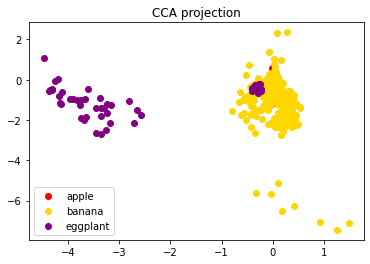

In [87]:

CLASS_LABELS = ['B', 'BBB', 'AAA']

feat_dim = max(x[0].shape)
projections = Projections(feat_dim, CLASS_LABELS)
# CCA Projection
cca_proj, white_cov = projections.cca_projection(x, Y)
# Show CCA 2D Projection
proj2D_viz = Project2D(cca_proj, CLASS_LABELS)
proj2D_viz.project_data(x, Y, white=white_cov, title='CCA projection')


## SVM: AAA vs BBB vs B

In [88]:
Y.shape

(493, 1)

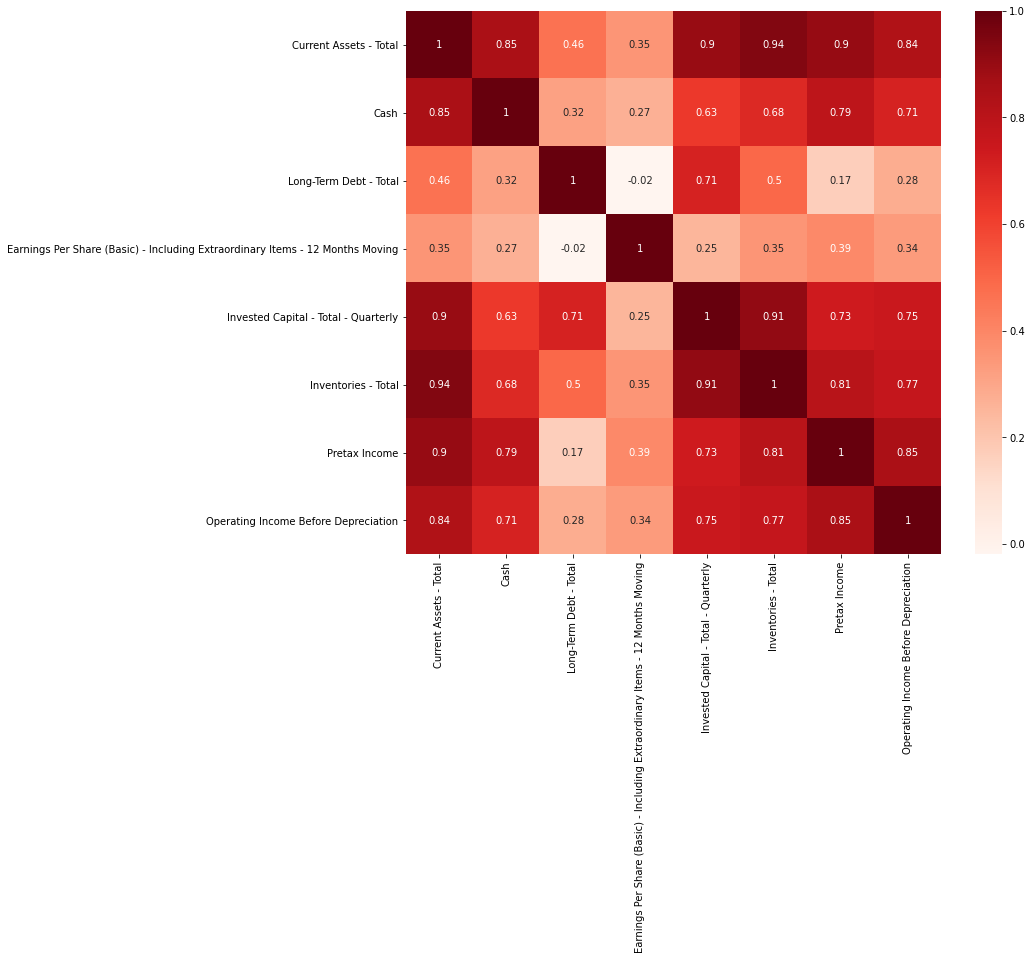

,Current Assets - Total,Cash,Long-Term Debt - Total,Earnings Per Share (Basic) - Including Extraordinary Items - 12 Months Moving,Invested Capital - Total - Quarterly,Inventories - Total,Pretax Income,Operating Income Before Depreciation,rating
0,8839.000,2353.000,5541.000,7.46,21369.000,1682.000,1291.000,4363.000,1.0
1,8780.000,1608.000,5537.000,6.52,22346.000,1452.000,357.000,5770.000,1.0
2,9436.000,1968.000,5517.000,7.64,23634.000,1552.000,1485.000,1842.000,1.0
3,8886.000,2194.000,5506.000,8.28,24410.000,1432.000,961.000,3535.000,1.0
4,7479.000,827.000,5548.000,5.63,24462.000,1516.000,213.000,4725.000,1.0
...,...,...,...,...,...,...,...,...,...
488,6394.031,2082.388,15465.745,-1.11,29167.541,972.125,-3661.675,5010.115,1.0
489,6816.082,2544.431,16006.519,-1.08,31002.848,953.245,478.424,1053.507,1.0
490,7558.467,2663.722,16318.449,-1.24,31894.083,1062.280,714.638,2453.196,1.0
491,8197.822,2684.021,16325.553,-1.25,32579.272,1134.191,626.969,4102.133,1.0


In [89]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))

xdf = pd.DataFrame(x, columns=numerical)
cor = xdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
cols = numerical.copy()
cols.append('rating')
full = pd.DataFrame(np.hstack((x, Y)), columns=cols) 
full

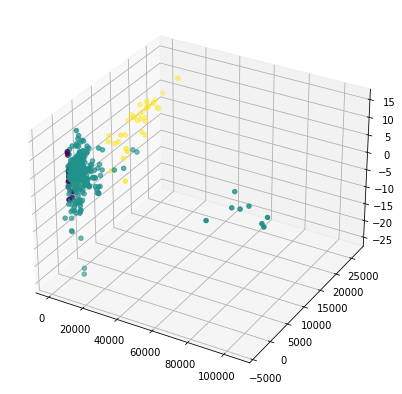

In [90]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111,projection='3d') 


ax.scatter(full['Long-Term Debt - Total'],full['Pretax Income'], full['Earnings Per Share (Basic) - Including Extraordinary Items - 12 Months Moving'], c=full['rating'], cmap=plt.cm.viridis)
# plt.show()
# for angle in range(0, 360):
#     ax.view_init(120, 0)
#     plt.draw()
#     plt.pause(.01)


In [91]:
from sklearn import svm

In [92]:
Y=Y.ravel()


In [93]:
x_temp = merged.loc[ind_to_keep, numerical].values

In [94]:
x = x_temp[:, [2, 3, 6]]

In [95]:
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(x, Y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x, Y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(x, Y)
lin_svc = svm.LinearSVC(C=C).fit(x, Y)

# create a mesh to plot in
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(x[:, 0], x[:, 1], c=Y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

c:\users\rodri\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


MemoryError: Unable to allocate 82.8 GiB for an array with shape (2092, 5314050) and data type float64

In [96]:
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(x, Y)
preds = svc.predict(x)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [97]:
sum(Y == preds)/Y.shape[0]

0.9249492900608519

In [98]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


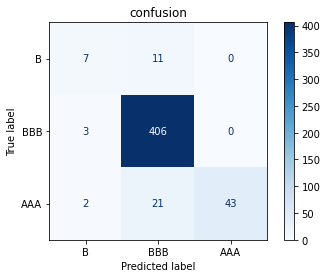

In [99]:
disp = plot_confusion_matrix(svc, x, Y,
                                 display_labels=['B', 'BBB','AAA'],
                                 cmap=plt.cm.Blues)
disp.ax_.set_title('confusion')

# print(title)
# print(disp.confusion_matrix)

plt.show()

In [66]:
print(classification_report(Y, preds, target_names=['B', 'BBB','AAA']))

              precision    recall  f1-score   support

           B       0.58      0.39      0.47        18
         BBB       0.93      0.99      0.96       409
         AAA       1.00      0.65      0.79        66

    accuracy                           0.92       493
   macro avg       0.84      0.68      0.74       493
weighted avg       0.92      0.92      0.92       493

